# Proyecto Final Python Intermedio
**Por:** Josué Martínez García

**E-mail:** josue.martinez.2@train.ia.center

## 1. Introducción

[arXiv](https://arxiv.org/) es un repositorio (biblioteca digital gratuita) de carácter temático y de gran prestigio internacional. Fue creado por Paul Ginsparg en 1991, convirtiéndose en uno de los primeros proyectos de su clase, de lo que luego se conocería como el movimiento de acceso abierto (Open Access).  es un archivo en línea para las prepublicaciones de artículos científicos en el campo de las matemáticas, física, ciencias de la computación y biología cuantitativa. En muchos campos de las matemáticas y la física, casi todos los artículos científicos se colocan en arXiv y en mayor medida artículos relacionados a la física de partículas.

<div>
<p style = 'text-align:center;'>
<img src="../imagenes/ArXiv_logo_2022.png" alt="JuveR" width="300px">
</p>
</div>

En este proyecto se buscar explorar esta base de datos con el objetivo de recabar y explora aquellas entradas hacia artículos cientificos que estan relacionados con un tema en espcifico dado el buscador incorparado en el sitio web. Se realizo la busqueda del texto: ***heavy ion collisions*** y en base a los resultados arrrojados por el sitio se realizo WebScapting con lo que se logró obtener el dataframe alojado en el arrchivo *WebScrap_Proyecto.csv* en la carpeta *datasets*. El proceso para la optención de este dataframe se encuentra en la apeta *code* y más especificamente en el script *Script_WebScrap_Proyecto_Final*. El conjunto de datos esta compuesto por:

- Titulo del artículo
- Autores del artículo
- URL de la entrada individual del artículo dentro del sitio
- Categorias en las que se enmarca el artículo dentro del sitio
- Fecha de publicación
- Mes de publicación
- Año de publicación
- Resumen

## 2. Exploracion de Datos

- Importación de librerias a usarse

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

- Caga de datos desde archivo .csv para realizar el análisi

In [36]:
ruta_archivo = '../datasets/WebScrap_Proyecto.csv'
datos = pd.read_csv(ruta_archivo)

- Descrripción inicial de los datos

In [181]:
datos.head(5)

,Titulo,Autores,URL,Fecha_Envío,Mes_Envío,Año_Envío,Categorias,Resumen,Categoria_1
0,Diquarks and the production of charmed baryons,"['Hyeongock Yun', 'Sungsik Noh', 'Sanghoon Lim...",https://arxiv.org/abs/2308.06760,"13 August, 2023",August,2023,"['High Energy Physics - Phenomenology', 'Nucle...",Utilizing a quark model characterized by param...,High Energy Physics - Phenomenology
1,"""QGP Signatures"" Revisited","['John W. Harris', 'Berndt Müller']",https://arxiv.org/abs/2308.05743,"10 August, 2023",August,2023,"['High Energy Physics - Phenomenology', 'Nucle...",We revisit the graphic table of QCD signatures...,High Energy Physics - Phenomenology
2,Comparing pion production in transport simulat...,"['Jun Xu', 'Hermann Wolter', 'Maria Colonna', ...",https://arxiv.org/abs/2308.05347,"10 August, 2023",August,2023,"['Nuclear Theory', 'Nuclear Experiment']",Within the Transport Model Evaluation Project ...,Instrumentation and Detectors
3,Preequilibrium cluster emission and fragmentat...,"['Hui-Gan Cheng', 'Zhao-Qing Feng']",https://arxiv.org/abs/2308.04852,"9 August, 2023",August,2023,['Nuclear Theory'],A new method is proposed by incorporating the ...,Nuclear Theory
4,STAR Experimental Highlights at Hard Probes 2023,['Nihar Ranjan Sahoo'],https://arxiv.org/abs/2308.04801,"9 August, 2023",August,2023,"['Nuclear Experiment', 'High Energy Physics - ...",We highlight the STAR experiment's hard probes...,High Energy Physics - Lattice


In [182]:
datos.describe()

,Año_Envío
count,10000.000000
mean,2012.115600
std,7.219713
min,1996.000000
25%,2007.000000
50%,2013.000000
75%,2018.000000
max,2023.000000


- Graficación de publicaciones por mes

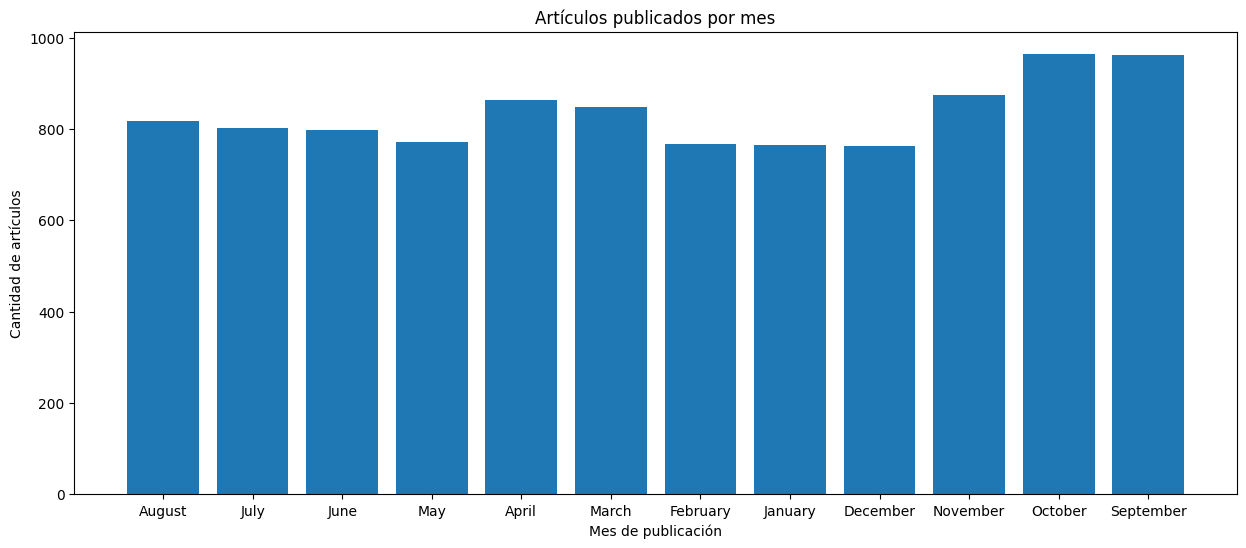

In [23]:
total_por_mes = datos.groupby(by=['Mes_Envío'])
#print(total_por_mes.count())

plt.figure(figsize=(15, 6))
plt.bar(x=datos.Mes_Envío.unique() ,height= total_por_mes.Titulo.count()) #, tick_label = datos.Mes_Envío.unique())
plt.xlabel('Mes de publicación')
plt.ylabel('Cantidad de artículos')
plt.title('Artículos publicados por mes')
plt.xticks()
plt.show()

- Grafico de publicaciones por año

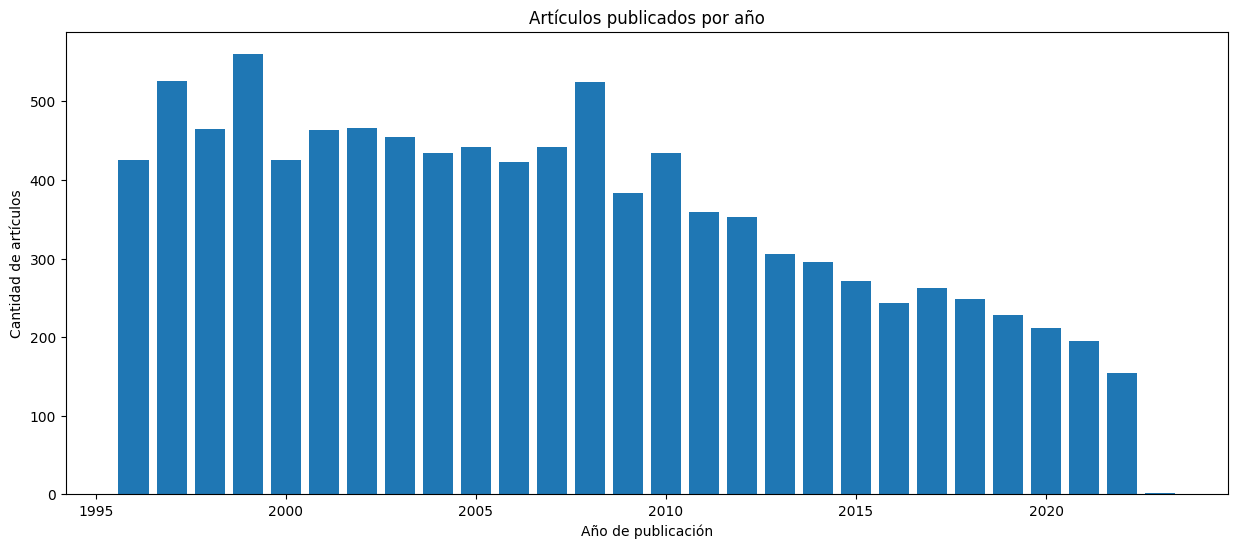

In [24]:
total_por_año = datos.groupby(by=['Año_Envío'])
#print(total_por_mes.count())

plt.figure(figsize=(15, 6))
plt.bar(x=datos.Año_Envío.unique() ,height= total_por_año.Titulo.count()) #, tick_label = datos.Mes_Envío.unique())
plt.xlabel('Año de publicación')
plt.ylabel('Cantidad de artículos')
plt.title('Artículos publicados por año')
plt.xticks()
plt.show()

- Grafico de distribución de categorias en los artículos.

Se toma la primer categoria de la lista como la representativa del artículo

In [123]:
patron = r"'([^']*)'"
categoria_unica = []
for i in datos['Categorias']:
    for j in range(len(i)):
        texto = datos['Categorias'][j]
        primera_categoria = re.search(patron, texto)
    categoria_unica.append(primera_categoria.group(1))     
        
datos['Categoria_1'] = categoria_unica

print(datos['Categoria_1'])

0       High Energy Physics - Phenomenology
1       High Energy Physics - Phenomenology
2             Instrumentation and Detectors
3                            Nuclear Theory
4             High Energy Physics - Lattice
                       ...                 
9995    High Energy Physics - Phenomenology
9996    High Energy Physics - Phenomenology
9997    High Energy Physics - Phenomenology
9998    High Energy Physics - Phenomenology
9999                         Nuclear Theory
Name: Categoria_1, Length: 10000, dtype: object


Se grafica la distrribución de los artículos respecto a estas categorias.

Index(['High Energy Physics - Lattice', 'High Energy Physics - Phenomenology',
       'Instrumentation and Detectors', 'Nuclear Experiment',
       'Nuclear Theory'],
      dtype='object', name='Categoria_1')


Text(0.5, 1.0, 'Distribución de artículos en categorias')

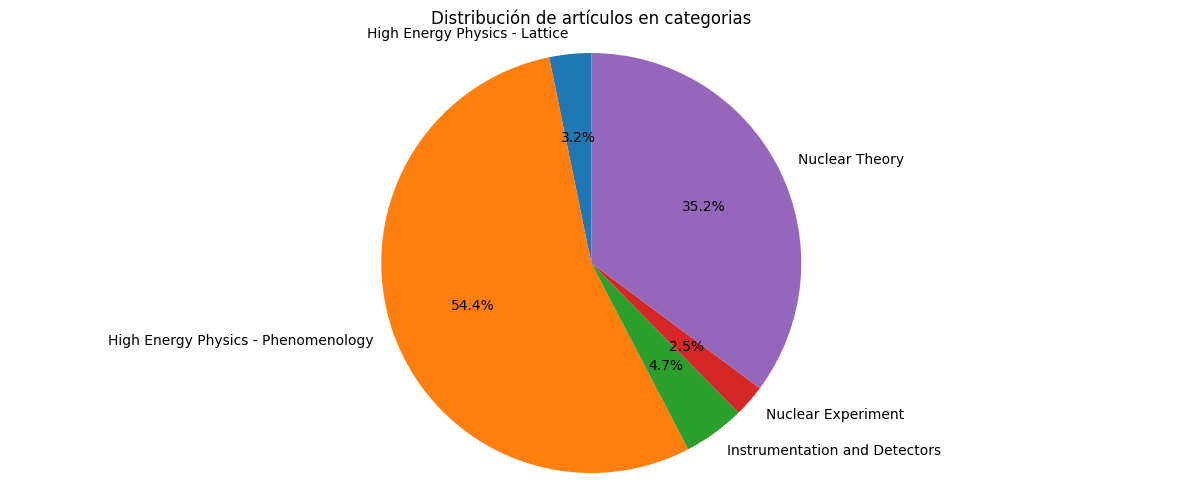

In [180]:
total_por_categoria = datos.groupby(by=['Categoria_1'])
#print(total_por_categoria.count()[total_por_categoria.count().Titulo > 30].index)

valores_filtados = total_por_categoria.count()[total_por_categoria.count().Titulo > 30].Titulo
etiquetas_filtradas = total_por_categoria.count()[total_por_categoria.count().Titulo > 30].index

plt.figure(figsize=(15, 6))
plt.pie(valores_filtados, labels=etiquetas_filtradas, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribución de artículos en categorias')
#plt.show()

- De los títulos de los artículos se realiza un grafico de nube de palabras para representar las palabras con más apariciones

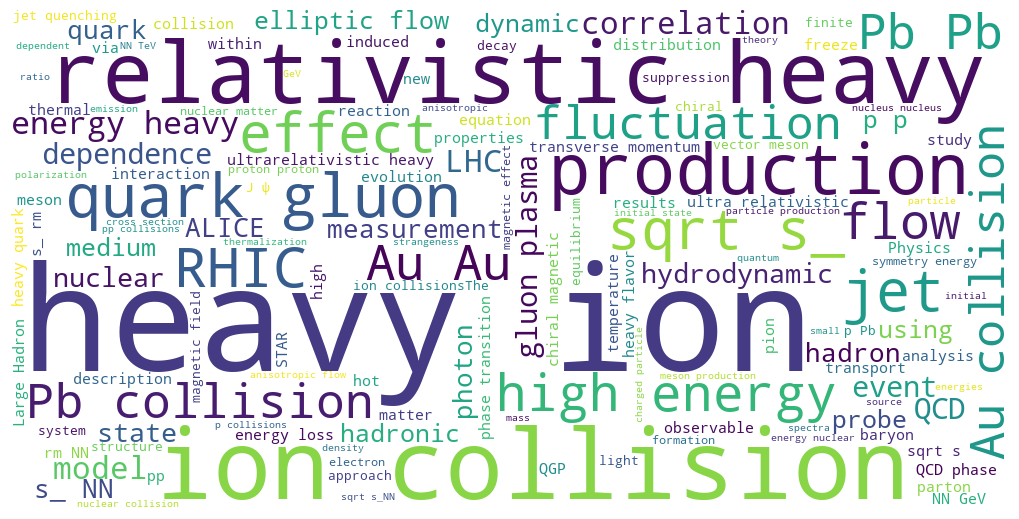

In [59]:
from wordcloud import WordCloud

contenido = ''
for i in datos['Titulo']:
    contenido = contenido + i

# Crear un objeto WordCloud
nube_palabras = WordCloud(width=1000, height=500,
                          background_color='white',
                          min_font_size=10).generate(contenido)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(nube_palabras)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 3. Conclusiones

- Se encontró que los meses en los que más se publica en este sitio se encuentran en la segunda mitad del año, siendo septiembre y occtubre los de mayor frecuencia. Lo que podría dar indicios a como es el ritmo de trabajo de la academia de física de partículas.

- La cantidad de artículos publicados  relacionados con el tema de colisiones de iones pesados en el sitio parece tener una tendencia a la baja durante los últimos años, loo que podía ser causado por diversos factores como el cambio en los intereses de los cientificos, el estancamiento de desarrollo de conocimiento tecnologico o humano en esta área. Es podría ser un punto importante para indagar en análisis más robustos.

- La mayor parte de los artículos resultado de la busqueda de colisiones de iones pesados se encuentran en las categorias de Teoría nuclear y Fenomenologia. Siendo un porrcentaje muy bajo el correspondiente a la parte experimental. Esto podría indicar que el desarrollo experimental se esta quedando atras respecto al desarrollo teorico.

- De la nube de palabras se puede observar que las palabras en mayor tamaño corresponden a los topicos principales cuando de colisiones de iones nucleares se habla, donde se puede observar a los dos mas grandes experimentos (ALICE y RHIC) dentro de este tipo de colisiones. Además, de los sistemas de colisión más usados en estos experimentos, el *Pb+Pb* y *Au+Au*.